In [1]:
import pymc3 as pm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import bernoulli
from IPython.display import display
import collections

# Considere el modelo Beta-Binomial para la moneda

## Implemente el modelo en pycm3 para los priors Beta(1, 1) y Beta(50, 50)\*

\* Beta(100, 100) trae errores numéricos con los que no vale la pena lidiar

In [2]:
num_samples = 10000.0
def trace_beta(alpha, beta):
    model = pm.Model()
    with model:
        theta = pm.Beta('theta', alpha = alpha, beta = beta)
        trace = pm.sample(num_samples)
    return trace


In [3]:
def foo(n, k_observed, alpha, beta):
    model = pm.Model()
    with model:
        theta = pm.Beta('theta', alpha = alpha, beta = beta)
        k = pm.Binomial('k', n = n, p = theta, observed = k_observed)
        k_tilde = pm.Binomial('k_tilde', n = 1, p = theta)
        trace = pm.sample(num_samples)
        model_map = pm.find_MAP(model = model)['theta']
    return trace, model_map

trace_6611, model_map_6611 = foo(6, 6, 1, 1)
trace_665050, model_map_665050 = foo(6, 6, 50, 50)

trace_3311, model_map_3311 = foo(3, 3, 1, 1)
trace_335050, model_map_335050 = foo(3, 3, 50, 50)
trace_202011, model_map_202011 = foo(20, 20, 1, 1)
trace_20205050, model_map_20205050 = foo(20, 20, 50, 50)


Assigned NUTS to theta_logodds__
Assigned Metropolis to k_tilde
 99%|█████████▉| 10426/10500.0 [00:08<00:00, 1217.83it/s]/Users/personal/anaconda2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:467: UserWarning: Chain 0 contains 4 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 10500/10500.0 [00:08<00:00, 1217.61it/s]
logp = -4.852, ||grad|| = 2.5: 100%|██████████| 8/8 [00:00<00:00, 1698.87it/s]
Assigned NUTS to theta_logodds__
Assigned Metropolis to k_tilde
100%|██████████| 10500/10500.0 [00:08<00:00, 1201.47it/s]
logp = -2.7777, ||grad|| = 2.5: 100%|██████████| 6/6 [00:00<00:00, 1547.14it/s]
Assigned NUTS to theta_logodds__
Assigned Metropolis to k_tilde
100%|██████████| 10500/10500.0 [00:09<00:00, 1124.40it/s]
logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<00:00, 1427.20it/s]
Assigned NUTS to theta_logodds__
Assigned Metropolis to k_tilde
100%|██████████| 105

In [4]:
def bar(trace, k):
    return np.mean([bernoulli(x).pmf(k) for x in trace])


### Grafique las posteriors resultantes de observar 6 caras de 6 tiradas
### Calcula el MAP (máximo a posteriori) y las medias de ambas posterioris
### Prediga, para ambos priors, el resultado de una nueva tirada de moneda

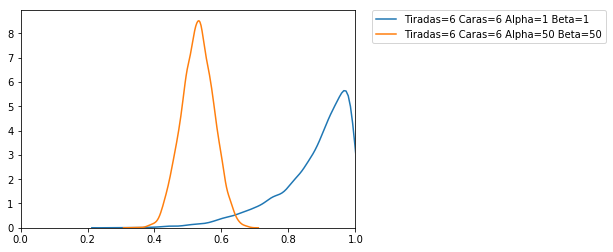

,Tiradas,Caras,Alpha,Beta,Map,Mean,Prob next 0 with sampling,Prob next 1 with sampling,Prob next 0 with distribution,Prob next 1 with distribution
0,6,6,1,1,0.857142841108,0.875808,0.1137,0.8863,0.124192,0.875808
1,6,6,50,50,0.523809523763,0.528841,0.4604,0.5396,0.471159,0.528841


In [5]:
ax = sns.kdeplot(trace_6611['theta'], label = 'Tiradas=6 Caras=6 Alpha=1 Beta=1')
ax.set_xlim([0, 1])

ax = sns.kdeplot(trace_665050['theta'], label = 'Tiradas=6 Caras=6 Alpha=50 Beta=50')
ax.set_xlim([0, 1])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

probs_6611 = map(lambda x: x / num_samples, np.bincount(trace_6611['k_tilde']))
probs_665050 = map(lambda x: x / num_samples, np.bincount(trace_665050['k_tilde']))

probs_6611.append(bar(trace_6611['theta'], 0))
probs_6611.append(1 - probs_6611[-1])
probs_665050.append(bar(trace_665050['theta'], 0))
probs_665050.append(1 - probs_665050[-1])

od = collections.OrderedDict()
od['Tiradas'] = pd.Series([6, 6])
od['Caras'] = pd.Series([6, 6])
od['Alpha'] = pd.Series([1, 50])
od['Beta'] = pd.Series([1, 50])
od['Map'] = pd.Series([model_map_6611, model_map_665050])
od['Mean'] = pd.Series([pm.df_summary(trace_6611)['mean']['theta'], pm.df_summary(trace_665050)['mean']['theta']])
od['Prob next 0 with sampling'] = pd.Series([probs_6611[0], probs_665050[0]])
od['Prob next 1 with sampling'] = pd.Series([probs_6611[1], probs_665050[1]])
od['Prob next 0 with distribution'] = pd.Series([probs_6611[2], probs_665050[2]])
od['Prob next 1 with distribution'] = pd.Series([probs_6611[3], probs_665050[3]])
df = pd.DataFrame(od)

display(df)


### Repita los puntos anteriores para una situación en la que se observan 20 caras de 20 tiradas y otra en la que se observan 3 caras de 3 tiradas

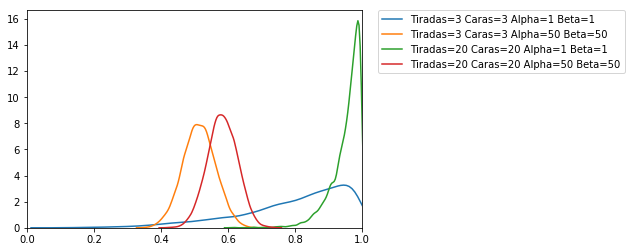

,Tiradas,Caras,Alpha,Beta,Map,Mean,Prob next 0 with sampling,Prob next 1 with sampling,Prob next 0 with distribution,Prob next 1 with distribution
0,3,3,1,1,0.74999969418,0.799527,0.2005,0.7995,0.200473,0.799527
1,3,3,50,50,0.509803848947,0.514379,0.4801,0.5199,0.485621,0.514379
2,20,20,1,1,0.952380948418,0.954281,0.0423,0.9577,0.045719,0.954281
3,20,20,50,50,0.579831930758,0.583504,0.4209,0.5791,0.416496,0.583504


In [6]:
ax = sns.kdeplot(trace_3311['theta'], label = 'Tiradas=3 Caras=3 Alpha=1 Beta=1')
ax.set_xlim([0, 1])

ax = sns.kdeplot(trace_335050['theta'], label = 'Tiradas=3 Caras=3 Alpha=50 Beta=50')
ax.set_xlim([0, 1])

ax = sns.kdeplot(trace_202011['theta'], label = 'Tiradas=20 Caras=20 Alpha=1 Beta=1')
ax.set_xlim([0, 1])

ax = sns.kdeplot(trace_20205050['theta'], label = 'Tiradas=20 Caras=20 Alpha=50 Beta=50')
ax.set_xlim([0, 1])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

probs_3311 = map(lambda x: x / num_samples, np.bincount(trace_3311['k_tilde']))
probs_335050 = map(lambda x: x / num_samples, np.bincount(trace_335050['k_tilde']))
probs_202011 = map(lambda x: x / num_samples, np.bincount(trace_202011['k_tilde']))
probs_20205050 = map(lambda x: x / num_samples, np.bincount(trace_20205050['k_tilde']))

probs_3311.append(bar(trace_3311['theta'], 0))
probs_3311.append(1 - probs_3311[-1])
probs_335050.append(bar(trace_335050['theta'], 0))
probs_335050.append(1 - probs_335050[-1])
probs_202011.append(bar(trace_202011['theta'], 0))
probs_202011.append(1 - probs_202011[-1])
probs_20205050.append(bar(trace_20205050['theta'], 0))
probs_20205050.append(1 - probs_20205050[-1])

od = collections.OrderedDict()
od['Tiradas'] = pd.Series([3, 3, 20, 20])
od['Caras'] = pd.Series([3, 3, 20, 20])
od['Alpha'] = pd.Series([1, 50, 1, 50])
od['Beta'] = pd.Series([1, 50, 1, 50])
od['Map'] = pd.Series([model_map_3311, model_map_335050, model_map_202011, model_map_20205050])
od['Mean'] = pd.Series([pm.df_summary(trace_3311)['mean']['theta'], pm.df_summary(trace_335050)['mean']['theta'], pm.df_summary(trace_202011)['mean']['theta'], pm.df_summary(trace_20205050)['mean']['theta']])
od['Prob next 0 with sampling'] = pd.Series([probs_3311[0], probs_335050[0], probs_202011[0], probs_20205050[0]])
od['Prob next 1 with sampling'] = pd.Series([probs_3311[1], probs_335050[1], probs_202011[1], probs_20205050[1]])
od['Prob next 0 with distribution'] = pd.Series([probs_3311[2], probs_335050[2], probs_202011[2], probs_20205050[2]])
od['Prob next 1 with distribution'] = pd.Series([probs_3311[3], probs_335050[3], probs_202011[3], probs_20205050[3]])
df = pd.DataFrame(od)

display(df)


#### Qué puede concluir de los priors elegidos? Y del modelo en general?

Cuanto mayores son los valores alfa y beta de la distribución Beta del prior (y asumiendo que alfa = beta), más certeza tenemos de que la moneda no está cargada: esto tiene sentido ya que esta distribución codifica que "vimos _alfa + beta_ repeticiones del experimento, con _alfa_ caras y _beta_ cecas"; si estamos muy seguros de que la moneda no está cargada, entonces usaremos alfa = beta y valores elevados de alfa.

Por otro lado, si tenemos total ignorancia de si la moneda se encuentra o no cargada, podemos codificar esto utilizando una Beta(1,1), que representa una distribución uniforme. Esto codifica que, para nosotros, la probabilidad de que la moneda esté o no cargada es la misma.

Cuanto mayor sea el número de tiradas y caras vistas, más influenciarán las observaciones sobre nuestro conocimiento previo, y más convicción necesitaremos en nuestro prior para evitar que quede opacado por las observaciones (es decir, necesitaremos valores más altos de alfa y beta). Notemos en los gráficos presentados arriba que cuando la cantidad de observaciones aumenta para el caso en el que creemos que la moneda no está cargada, la distribución "se corre" hacia la derecha, mostrando una tendencia a pensar que probablemente esté un poco cargada. En el caso en que tenemos ignorancia sobre si está o no cargada, a medida que la cantidad de observaciones aumenta, más seguros nos volvemos de que la moneda está cargada (vemos un pico cada vez más pronunciado cerca del 1).

El modelo en general creemos que explica bien el mecanismo usual que nosotros mismos usaríamos para corroborar si una moneda está o no cargada: en nuestras cabezas tenemos algún prior sobre la moneda, y hacemos unas cuantas tiradas de la misma para saber si efectivamente está cargada o no. 
Si luego de alguna cantidad significativa de tiradas (que estará determinada por cuáles fueron nuestros alfa y beta en el prior) los resultados que vemos se corresponden con el prior, concluiremos que entonces la moneda sigue nuestras creencias previas (en términos del modelo, la distribución de la posterior es muy similar a la del prior); si por el contrario comenzamos a ver que los resultados de las tiradas se contradicen con nuestra asunción (si por ejemplo, creíamos que la moneda no estaba cargada pero vemos constantemente caras), entonces comenzaremos a sospechar que sí está cargada.  Si nuestro conocimiento previo era de total ignorancia respecto a la moneda (i.e., Beta(1,1)), entonces las conclusiones que saquemos estarán dadas exclusivamente por las observaciones.

### Pensando en su propia experiencia, considere cuántas caras consecutivas le harían empezar a sospechar que la moneda está cargada. A partir de este número y usando el modelo, diga cuáles son los parámetros de prior Beta

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500.0 [00:04<00:00, 2615.09it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500.0 [00:04<00:00, 2526.52it/s]


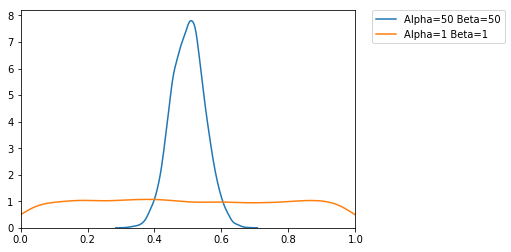

Assigned NUTS to theta_logodds__
Assigned Metropolis to k_tilde
100%|██████████| 10500/10500.0 [00:09<00:00, 1120.90it/s]
logp = -37.451, ||grad|| = 40.5: 100%|██████████| 7/7 [00:00<00:00, 1560.05it/s]
Assigned NUTS to theta_logodds__
Assigned Metropolis to k_tilde
 99%|█████████▉| 10380/10500.0 [00:08<00:00, 1186.41it/s]/Users/personal/anaconda2/lib/python2.7/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.87900971373, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 10500/10500.0 [00:08<00:00, 1186.60it/s]
logp = -39.526, ||grad|| = 40.5: 100%|██████████| 9/9 [00:00<00:00, 1856.43it/s]


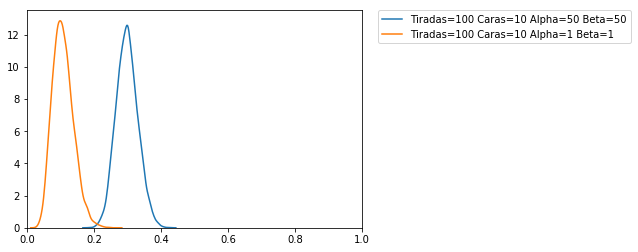

In [7]:
trace_50_50 = trace_beta(50, 50)
ax = sns.kdeplot(trace_50_50['theta'], label = 'Alpha=50 Beta=50')
ax.set_xlim([0, 1])

trace_1_1 = trace_beta(1, 1)
ax = sns.kdeplot(trace_1_1['theta'], label = 'Alpha=1 Beta=1')
ax.set_xlim([0, 1])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

trace_100_10_50_50, _= foo(100, 10, 50, 50)
ax = sns.kdeplot(trace_100_10_50_50['theta'], label = 'Tiradas=100 Caras=10 Alpha=50 Beta=50')
ax.set_xlim([0, 1])

trace_100_10_1_1, _= foo(100, 10, 1, 1)
ax = sns.kdeplot(trace_100_10_1_1['theta'], label = 'Tiradas=100 Caras=10 Alpha=1 Beta=1')
ax.set_xlim([0, 1])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
